In [7]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
from pathlib import Path

In [8]:
# https://data.cityofchicago.org/Transportation/Divvy-Bicycle-Stations/bbyy-e7gq/data
# station locations in Chicago
#https://divvy-tripdata.s3.amazonaws.com/index.html for trip data
divy_df = pd.read_csv("../Data/Chicago/Divvy_Bicycle_Stations.csv") #location of healthy ride bike stations

#get the 2010 census tracts in Chicago
cenTract = gpd.read_file('../Data/Chicago/CensusTract2010/geo_export_bf428af7-5d56-479c-9721-0ee9e91b6661.shp')

In [9]:
#convert hr_df to geodataframe to plot the bike stations on map
geometry = [Point(xy) for xy in zip(divy_df.Longitude, divy_df.Latitude)]
crs = 26916
divy_gdf = gpd.GeoDataFrame(divy_df, crs=crs, geometry=geometry)

Text(0.5, 1.0, 'Divvy Bike Station Locations Current Day')

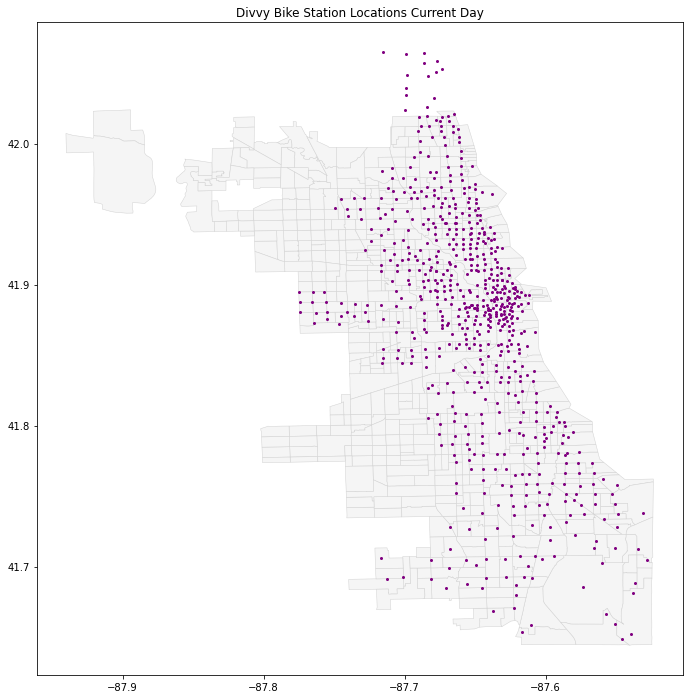

In [17]:
#plot the census tracts and the location of the bike stations
ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
divy_gdf.plot(ax=ax, color="Purple", markersize=4)
plt.title("Divvy Bike Station Locations Current Day")

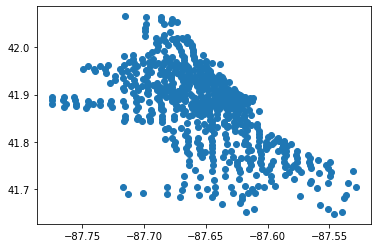

In [11]:
plt.scatter(divy_df['Longitude'], divy_df['Latitude'])
plt.show()

<AxesSubplot:>

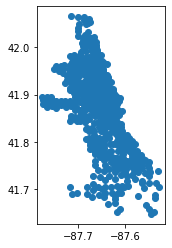

In [12]:
divy_gdf.plot()

In [5]:
cenTract

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,COMMAREA,COMMAREA_N,NOTES,geometry
0,17,031,842400,17031842400,8424,Census Tract 8424,44,44,None,"POLYGON ((1177855.557 1845080.015, 1177855.599..."
1,17,031,840300,17031840300,8403,Census Tract 8403,59,59,None,"POLYGON ((1160668.954 1878739.961, 1160672.597..."
2,17,031,841100,17031841100,8411,Census Tract 8411,34,34,None,"POLYGON ((1176043.375 1889735.517, 1176045.942..."
3,17,031,841200,17031841200,8412,Census Tract 8412,31,31,None,"POLYGON ((1160019.224 1890664.257, 1160010.757..."
4,17,031,838200,17031838200,8382,Census Tract 8382,28,28,None,"POLYGON ((1165501.359 1897445.310, 1165538.639..."
...,...,...,...,...,...,...,...,...,...,...
796,17,031,071000,17031071000,710,Census Tract 710,7,7,None,"POLYGON ((1169304.836 1913647.470, 1169306.196..."
797,17,031,071200,17031071200,712,Census Tract 712,7,7,None,"POLYGON ((1171907.021 1914880.325, 1171911.354..."
798,17,031,130300,17031130300,1303,Census Tract 1303,13,13,None,"POLYGON ((1152539.157 1937002.093, 1152443.466..."
799,17,031,292200,17031292200,2922,Census Tract 2922,29,29,None,"POLYGON ((1153199.386 1890446.375, 1153092.407..."


### Finding the number of stations they started with in 2013

In [13]:
stations_2013 = gpd.read_file('../Data/Chicago/TripData/Divvy_Stations_Trips_2013/Divvy_Stations_2013/Divvy_Stations_2013.shp')


<AxesSubplot:>

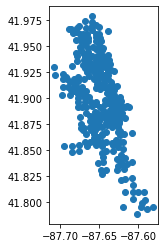

In [14]:
stations_2013.plot()

Text(0.5, 1.0, 'Divvy Bike Station Locations in 2013')

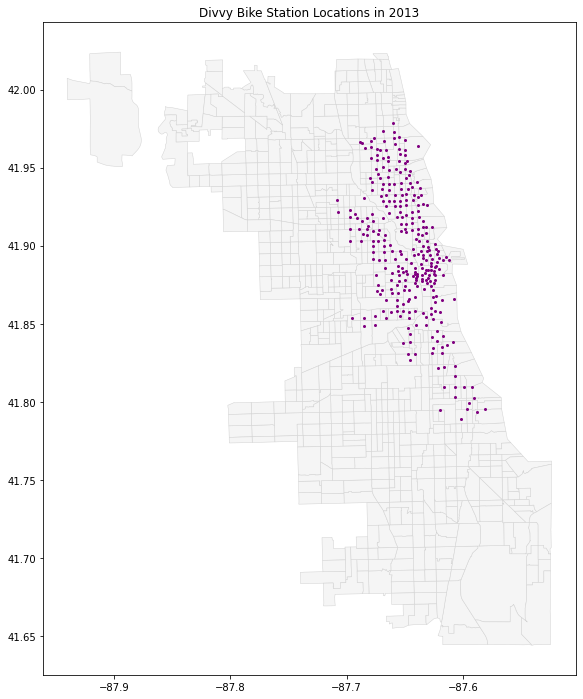

In [16]:
ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
stations_2013.plot(ax=ax, color="Purple", markersize=4)
plt.title("Divvy Bike Station Locations in 2013")